In [4]:
pip install kneed

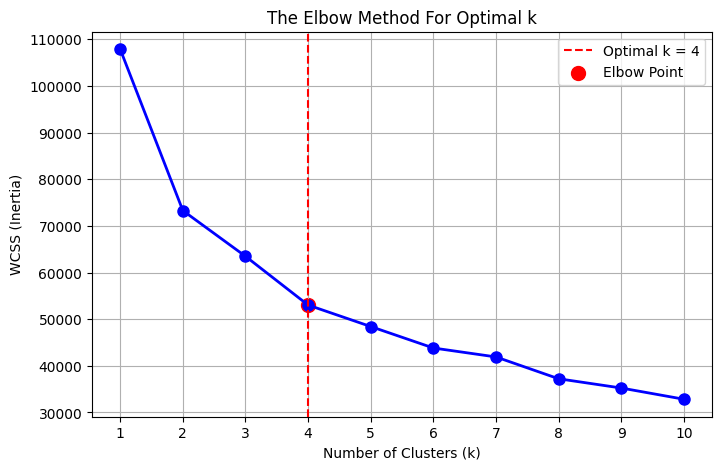


✅ Optimal number of clusters selected: k = 4



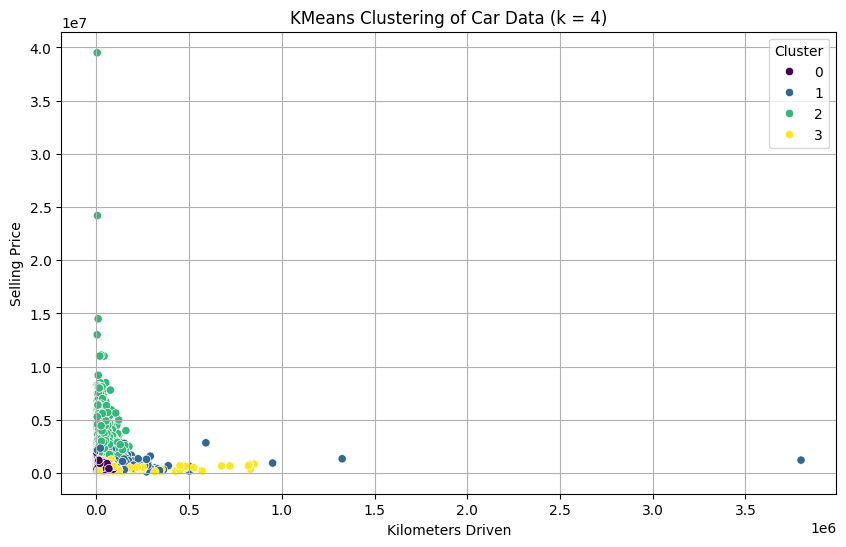

In [5]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

# Loading the dataset
file_path = 'cardekho_dataset.csv'
df = pd.read_csv(file_path)

# Selecting relevant features for clustering
features = df[['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']]

# Dropping rows with null values
features = features.dropna()

# Normalizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# ====================================
# Elbow Method with Automatic Detection
# ====================================
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Automatically find the elbow point
knee = KneeLocator(K, wcss, curve='convex', direction='decreasing')
optimal_k = knee.elbow

# Plotting the Elbow curve with selected k marked
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('The Elbow Method For Optimal k')
plt.grid(True)
plt.xticks(K)

# Annotate the elbow point
if optimal_k is not None:
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.scatter(optimal_k, wcss[optimal_k - 1], s=100, c='red', label='Elbow Point')
    plt.legend()

plt.show()

# ====================================
# Apply KMeans with optimal k
# ====================================
print(f"\n✅ Optimal number of clusters selected: k = {optimal_k}\n")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original dataframe
df = df.loc[features.index]  # Align index
df['Cluster'] = clusters

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='Cluster', palette='viridis')
plt.title(f'KMeans Clustering of Car Data (k = {optimal_k})')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
